In [1]:
import dianna
from dianna import visualization
import torchvision.transforms as transforms
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [2]:
transform = transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

In [3]:
first_Null = trainset.data[1]

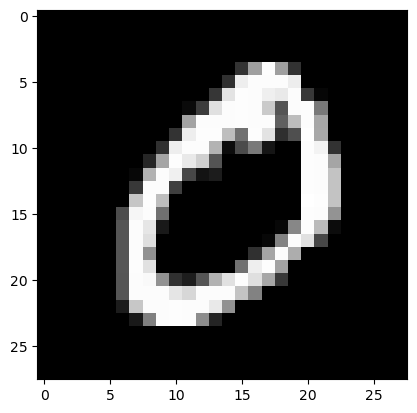

In [4]:
plt.imshow(first_Null, cmap="grey")

In [5]:
model_path = "mnist_model.onnx"

In [6]:
test_input = first_Null.numpy().reshape(1, 28,28).astype(np.float32)

explanation_heatmap_test = dianna.explain_image(model_path, test_input, method="RISE", labels=[0],n_masks=30000, axis_labels={0: 'channels'}, p_keep=0.5)

Explaining: 100%|██████████| 30000/30000 [00:41<00:00, 717.36it/s]


(<Figure size 640x480 with 2 Axes>, <Axes: >)

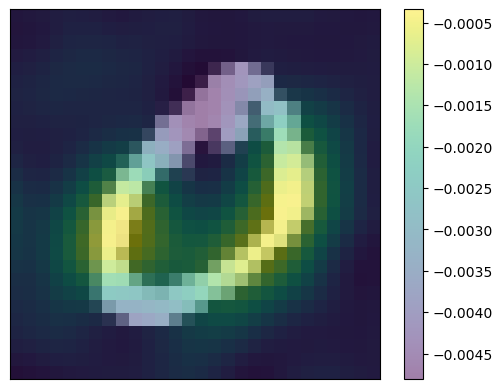

In [7]:
visualization.plot_image(explanation_heatmap_test.reshape(28, 28), original_data=test_input.reshape(28, 28), output_filename="erste_null.jpg")

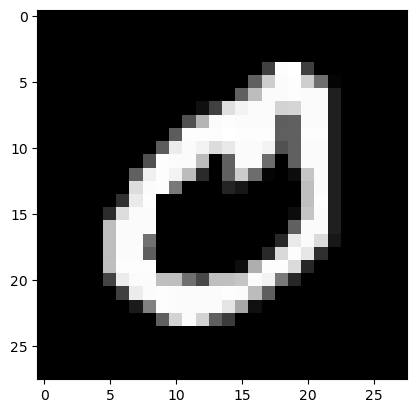

In [8]:
second_null = trainset.data[21]
plt.imshow(second_null, cmap="grey")

Explaining: 100%|██████████| 30000/30000 [00:40<00:00, 735.98it/s]


(<Figure size 640x480 with 2 Axes>, <Axes: >)

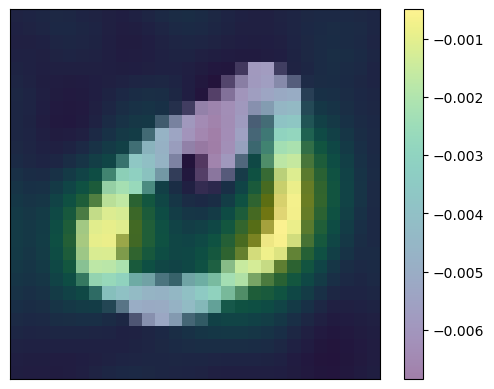

In [9]:
test_input_2 = second_null.numpy().reshape(1, 28,28).astype(np.float32)

explanation_heatmap_test_2 = dianna.explain_image(model_path, test_input_2, method="RISE", labels=[0],n_masks=30000, axis_labels={0: 'channels'}, p_keep=0.5)
visualization.plot_image(explanation_heatmap_test_2.reshape(28, 28), original_data=test_input_2.reshape(28, 28), output_filename="zweite_null.jpg")

In [10]:
test = explanation_heatmap_test + explanation_heatmap_test_2

(<Figure size 640x480 with 2 Axes>, <Axes: >)

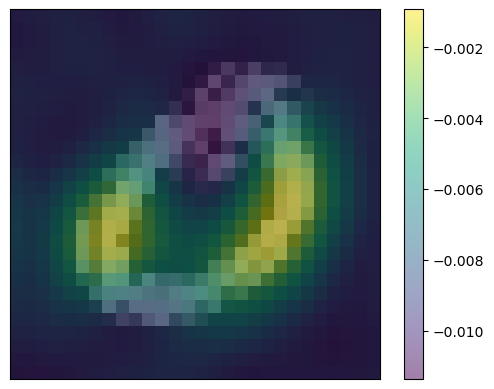

In [11]:
visualization.plot_image(test.reshape(28, 28), ((first_Null + second_null) / 2).numpy().reshape(28, 28),output_filename="erste_und_zweite_durchschnitt")